### **1. Data Loading (Feature-Engineered Dataset)**

In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("/content/sample_data/India_COVID19_Statewise_TimeSeries_Analytics_2021.csv")

In [7]:
df.head(2)

,Date,State_UT,Population,New_Cases,New_Deaths,New_Recoveries,Total_Cases,Total_Deaths,Total_Recoveries,Active_Cases
0,2021-01-01,Andaman and Nicobar,57755036,477,10,395,477,10,395,72
1,2021-01-02,Andaman and Nicobar,57755036,497,7,426,974,17,821,136


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['State_UT', 'Date'])

Purpose - Load modeling-ready dataset with engineered predictors.

### **2. Basic Feature Preparation**

In [10]:
df['Lag_1_New_Cases'] = df.groupby('State_UT')['New_Cases'].shift(1)
df['Lag_7_New_Cases'] = df.groupby('State_UT')['New_Cases'].shift(7)

df = df.dropna()

Purpose - Capture short-term dependency without artificial columns.

### **3. Target Variable Definition**

In [11]:
target = 'New_Cases'

features = [
    'Lag_1_New_Cases',
    'Lag_7_New_Cases',
    'Active_Cases',
    'New_Recoveries',
    'New_Deaths'
]

X = df[features]
y = df[target]

Purpose - Predict daily new cases.

### **4. Time-Aware Train-Test Split**

In [12]:
split_date = '2021-10-01'

train = df[df['Date'] < split_date]
test = df[df['Date'] >= split_date]

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

Purpose - Prevent leakage by preserving chronology.

### **5. Baseline Model – Linear Regression**

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

Purpose - Establish benchmark performance.

### **6. Tree-Based Model – Random Forest**

In [14]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=8,
    random_state=42
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

Purpose - Capture non-linear relationships between active cases and case growth.

### **7. Model Evaluation**

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(true, pred):
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    r2 = r2_score(true, pred)
    return mae, rmse, r2

lr_metrics = evaluate(y_test, lr_pred)
rf_metrics = evaluate(y_test, rf_pred)

print("Linear Regression:", lr_metrics)
print("Random Forest:", rf_metrics)

Linear Regression: (6.885531041875895, np.float64(8.555663145864768), 0.849595992682773)
Random Forest: (7.0416707956964215, np.float64(8.748621333634057), 0.8427352850691993)


Purpose - Quantify predictive performance objectively.

### **8. Feature Importance**

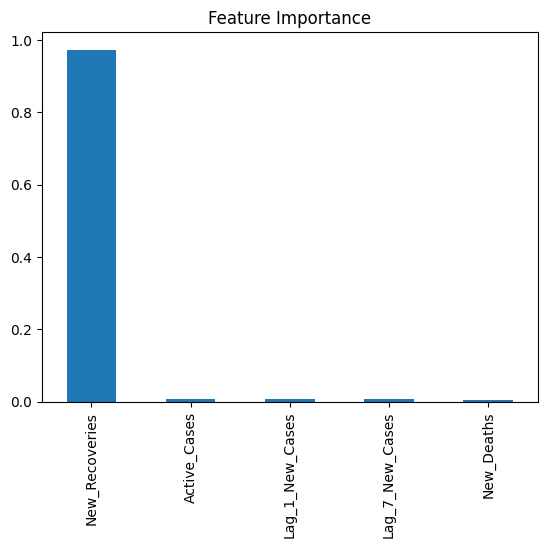

In [16]:
import matplotlib.pyplot as plt

importances = pd.Series(rf.feature_importances_, index=features)
importances = importances.sort_values(ascending=False)

importances.plot(kind='bar')
plt.title("Feature Importance")
plt.show()

Purpose - Identify drivers of new case prediction.